# Coffee Sales Visualization
This project is a simple visualization of coffee sales data to test my skills with pandas, matplotlib, and seaborn.
As someone who enjoys coffee, I thought it would be a fun project to work on.

The dataset source is from [Kaggle](https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset/data)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coffee_sales = pd.read_csv('Coffee_sales.csv')

In [3]:
print(coffee_sales.head())
print(coffee_sales.info())
print(coffee_sales.describe())

   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ----

Lets first find out which month has the highest total sales of coffee.

In [37]:
best_performing_month = coffee_sales.groupby(["Month_name"])["money"].sum().reset_index().max()
print(best_performing_month)

Month_name         Sep
money         15891.64
dtype: object


Now lets group the data by the month and visualize the sales by month.

   Month_name  Monthsort     money
4         Jan          1   6398.86
3         Feb          2  13215.48
7         Mar          3  15891.64
0         Apr          4   5719.56
8         May          5   8164.42
6         Jun          6   7617.76
5         Jul          7   6915.94
1         Aug          8   7613.84
11        Sep          9   9988.64
10        Oct         10  13891.16
9         Nov         11   8590.54
2         Dec         12   8237.74


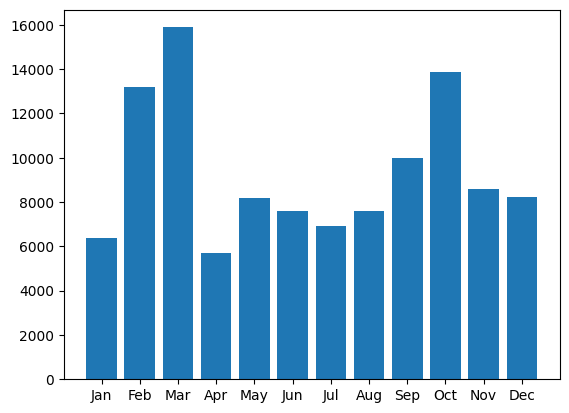

In [ ]:
grouped_by_month = coffee_sales.groupby(["Month_name","Monthsort"])["money"].sum().reset_index().sort_values(by="Monthsort")

plt.bar(grouped_by_month["Month_name"], grouped_by_month["money"])
plt.show()